# Creación del modelo

### 1. Obtención de datos

**Librerías**

In [6]:
import kagglehub
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


**Lectura de datos**

In [2]:
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
df = pd.read_csv(path+"/data.csv")

### EDA

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


<Axes: >

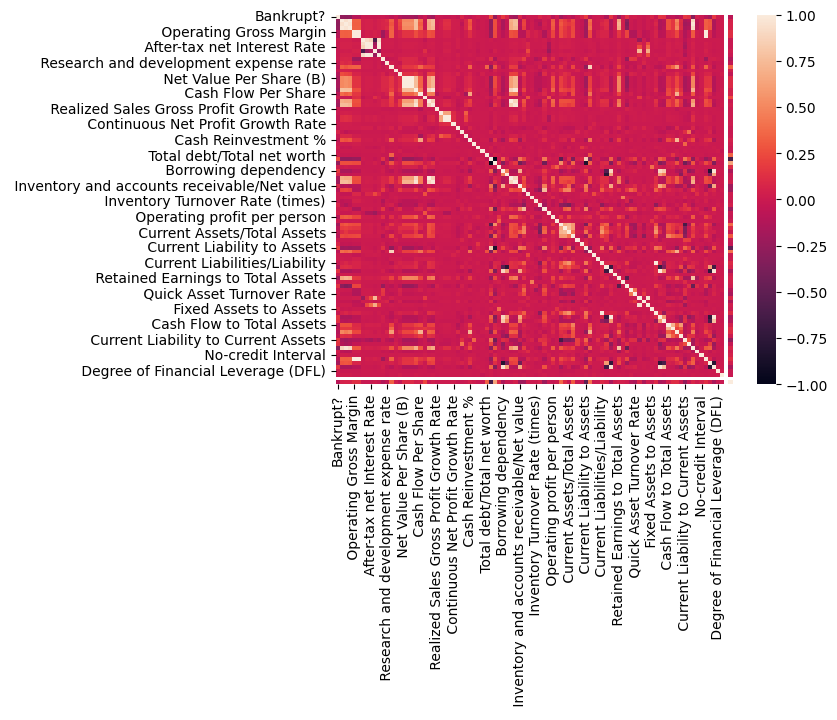

In [7]:
sns.heatmap(df.corr())

In [8]:
df['Bankrupt?'].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

### Preprocesamiento

In [14]:
# 1. Seleccionar variables
df_prep = df.iloc[:, 0:4]


In [12]:
df_prep.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax
0,1,0.370594,0.424389,0.405750
1,1,0.464291,0.538214,0.516730
2,1,0.426071,0.499019,0.472295
3,1,0.399844,0.451265,0.457733
4,1,0.465022,0.538432,0.522298


### Modelación

**Librerías**

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import pickle

In [15]:
df_prep.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax'],
      dtype='object')

**Test train split**

In [62]:
X = df_prep.drop(['Bankrupt?'], axis=1)
y = df_prep['Bankrupt?']

**Dividir en train y test set**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Estandarizar**

In [ ]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

**Crear modelo de regresión logística**

Exactitud (Accuracy): 0.9618768328445748

Matriz de Confusión:
 [[1311    2]
 [  50    1]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.33      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.65      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364



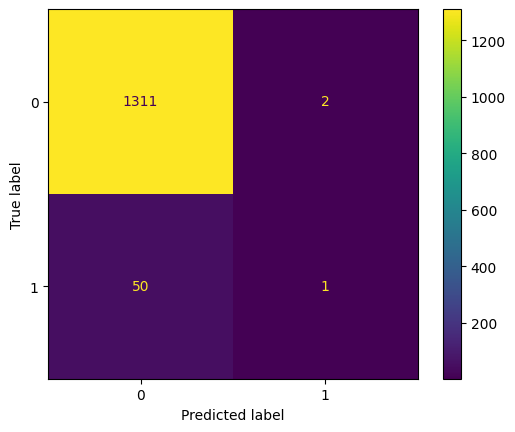

In [36]:
# Crear modelo
model = LogisticRegression(
    penalty='l2',           # Regularización L2 (Ridge)
    C=1.0,                  # Inverso de la fuerza de regularización
    solver='lbfgs',         # Algoritmo de optimización
    max_iter=1000,          # Número máximo de iteraciones
    random_state=42
)
model.fit(X_train, y_train)

# 5. Hacer predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva

# 6. Evaluar el modelo
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), )

cm_display.plot()
plt.show()

In [37]:

# 7. Obtener los coeficientes (para interpretación)
if len(model.coef_) == 1:  # Para clasificación binaria
    coefficients = pd.DataFrame({
        'Variable': [f'Feature_{i}' for i in range(X.shape[1])],
        'Coeficiente': model.coef_[0]
    })
else:  # Para clasificación multiclase
    coefficients = pd.DataFrame(model.coef_, columns=[f'Feature_{i}' for i in range(X.shape[1])])
    
print("\nCoeficientes del modelo:\n", coefficients)


Coeficientes del modelo:
     Variable  Coeficiente
0  Feature_0    -3.816482
1  Feature_1    -4.722458
2  Feature_2    -4.034522


### Empaquetar modelo

**Librerías**

In [63]:
import pickle
import joblib

In [38]:
file = open('model.pkl', 'wb')
pickle.dump(model, file)
file.close()

**Desempaquetar y usar modelo para predecir**

In [65]:
# Crear csv para probar modelo
rand_rows = [83, 923, 543, 398, 729]
testAPI = X_test.iloc[rand_rows, :]
testAPI

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax
2202,0.401745,0.442270,0.448579
2436,0.409204,0.460914,0.453504
73,0.532394,0.580680,0.574281
1835,0.497733,0.562309,0.553616
6025,0.471993,0.536851,0.524975


In [66]:
# Crear csv con datos de prueba
testAPI.to_csv('testAPI.csv', index=False)

In [67]:
# Cargar modelo
model = pickle.load(open('model.pkl','rb'))

# Cargar datos de prueba
df_testAPI = pd.read_csv('testAPI.csv')

# Predecir bankrupt
pred = model.predict(df_testAPI)
pred

array([0, 0, 0, 0, 0], dtype=int64)

---